# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [ ]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('/content/BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [ ]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [ ]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):

There is no significant relationship between the levels of masculinity in male characters and the success of fanfiction stories, when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


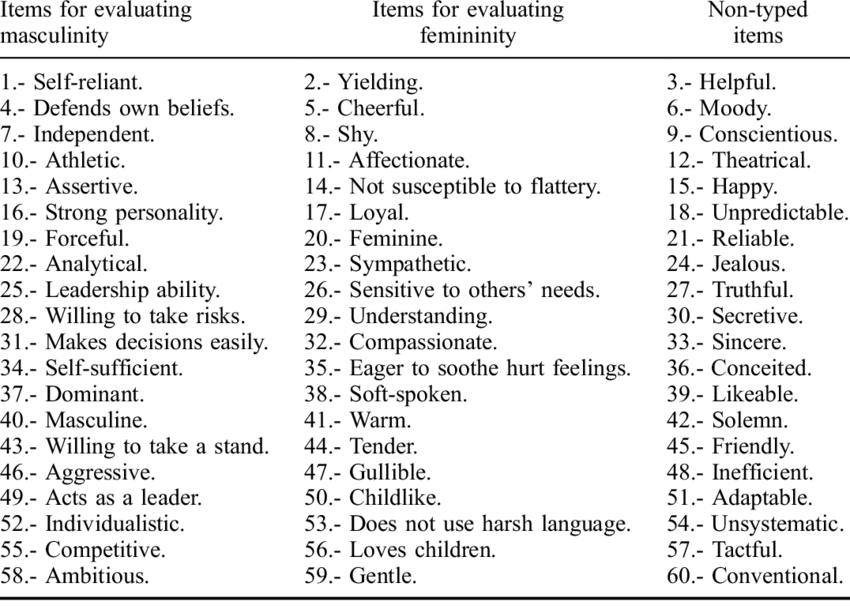

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
colab_directory_path = '/content/gdrive/MyDrive/riveter-test'

In [ ]:
%mkdir /content/gdrive/MyDrive/riveter-test

mkdir: cannot create directory ‘/content/gdrive/MyDrive/riveter-test’: File exists


In [ ]:
%cd /content/gdrive/MyDrive/riveter-test

/content/gdrive/MyDrive/riveter-test


In [ ]:
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [ ]:
%ls

riveter-nlp/


In [ ]:
%cd /content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter

/content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter


In [ ]:
!pip install -U spacy-experimental

In [ ]:
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 1.7 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm

2024-03-15 06:16:33.729747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 06:16:33.729803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 06:16:33.731637: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 06:16:33.740632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 06:16:35.203715: W tensorflow/compiler/tf2

In [ ]:
!pip install seaborn

In [ ]:
%ls

data/                      demo-NYT-Obits.ipynb    __pycache__/  test
demo.ipynb                 demo-reorganized.ipynb  riveter-nlp/  test_suite.py
demo-Little-Red-Cap.ipynb  __init__.py             riveter.py


In [ ]:
from collections import defaultdict
import os
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [ ]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [ ]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [ ]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    #❗️ write code below:
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)


Processing stories:   1%|          | 1/90 [00:34<50:35, 34.10s/it]

2024-03-14 21:26:55 Complete!
Story ID: 4706144, Masculine Power Score: 0.092137162676651



Processing stories:   2%|▏         | 2/90 [01:08<50:13, 34.25s/it]

2024-03-14 21:27:30 Complete!
Story ID: 4752980, Masculine Power Score: 0.2760922771567554



Processing stories:   3%|▎         | 3/90 [01:37<45:55, 31.68s/it]

2024-03-14 21:27:58 Complete!
Story ID: 4621698, Masculine Power Score: 0.579047619047619



Processing stories:   4%|▍         | 4/90 [02:08<45:25, 31.69s/it]

2024-03-14 21:28:30 Complete!
Story ID: 3651108, Masculine Power Score: 0.12219700652565105



Processing stories:   6%|▌         | 5/90 [02:43<46:13, 32.63s/it]

2024-03-14 21:29:04 Complete!
Story ID: 5282729, Masculine Power Score: 0.21656074809300616



Processing stories:   7%|▋         | 6/90 [03:16<46:10, 32.98s/it]

2024-03-14 21:29:38 Complete!
Story ID: 5533886, Masculine Power Score: -0.0049107142857142865



Processing stories:   8%|▊         | 7/90 [03:50<46:11, 33.39s/it]

2024-03-14 21:30:12 Complete!
Story ID: 4547622, Masculine Power Score: 0.060256486552003684



Processing stories:   9%|▉         | 8/90 [04:19<43:24, 31.76s/it]

2024-03-14 21:30:40 Complete!
Story ID: 16177508, Masculine Power Score: 0.19564933679944047



Processing stories:  10%|█         | 9/90 [04:51<43:15, 32.04s/it]

2024-03-14 21:31:13 Complete!
Story ID: 15745185, Masculine Power Score: -0.14867003671148027



Processing stories:  11%|█         | 10/90 [05:26<43:35, 32.69s/it]

2024-03-14 21:31:47 Complete!
Story ID: 15654528, Masculine Power Score: 0.2387516736427852



Processing stories:  12%|█▏        | 11/90 [05:55<41:38, 31.63s/it]

2024-03-14 21:32:16 Complete!
Story ID: 7448155, Masculine Power Score: 0.32226445448420205



Processing stories:  13%|█▎        | 12/90 [06:29<42:00, 32.31s/it]

2024-03-14 21:32:50 Complete!
Story ID: 4983847, Masculine Power Score: 0.11545335114486158



Processing stories:  14%|█▍        | 13/90 [07:00<40:54, 31.88s/it]

2024-03-14 21:33:21 Complete!
Story ID: 3313118, Masculine Power Score: -0.18953592603049121



Processing stories:  16%|█▌        | 14/90 [07:31<40:06, 31.67s/it]

2024-03-14 21:33:52 Complete!
Story ID: 3290390, Masculine Power Score: -0.11759896559786509



Processing stories:  17%|█▋        | 15/90 [08:09<41:55, 33.55s/it]

2024-03-14 21:34:30 Complete!
Story ID: 36435301, Masculine Power Score: 0.06547516392717631



Processing stories:  18%|█▊        | 16/90 [08:39<40:13, 32.62s/it]

2024-03-14 21:35:01 Complete!
Story ID: 36575491, Masculine Power Score: 0.2560810284188626



Processing stories:  19%|█▉        | 17/90 [09:10<38:55, 32.00s/it]

2024-03-14 21:35:31 Complete!
Story ID: 35225224, Masculine Power Score: 0.2413342575706706



Processing stories:  20%|██        | 18/90 [09:41<38:16, 31.90s/it]

2024-03-14 21:36:03 Complete!
Story ID: 4594527, Masculine Power Score: 0.16198038073038074



Processing stories:  21%|██        | 19/90 [10:09<36:17, 30.68s/it]

2024-03-14 21:36:31 Complete!
Story ID: 5485625, Masculine Power Score: 0.11258500120569084



Processing stories:  22%|██▏       | 20/90 [10:38<35:10, 30.15s/it]

2024-03-14 21:37:00 Complete!
Story ID: 36408319, Masculine Power Score: 0.13066932035972284



Processing stories:  23%|██▎       | 21/90 [11:15<37:05, 32.25s/it]

2024-03-14 21:37:37 Complete!
Story ID: 35762659, Masculine Power Score: 0.21001194225313702



Processing stories:  24%|██▍       | 22/90 [11:48<36:34, 32.28s/it]

2024-03-14 21:38:09 Complete!
Story ID: 35603194, Masculine Power Score: 0.3673100855587244



Processing stories:  26%|██▌       | 23/90 [12:19<35:54, 32.15s/it]

2024-03-14 21:38:41 Complete!
Story ID: 35344306, Masculine Power Score: 0.126505388797015



Processing stories:  27%|██▋       | 24/90 [12:47<33:49, 30.74s/it]

2024-03-14 21:39:09 Complete!
Story ID: 36695155, Masculine Power Score: 0.13111111111111112



Processing stories:  28%|██▊       | 25/90 [13:21<34:31, 31.87s/it]

2024-03-14 21:39:43 Complete!
Story ID: 36064474, Masculine Power Score: 0.10292775514854009



Processing stories:  29%|██▉       | 26/90 [13:53<33:59, 31.86s/it]

2024-03-14 21:40:15 Complete!
Story ID: 36024820, Masculine Power Score: 0.16983480456192865



Processing stories:  30%|███       | 27/90 [14:30<35:05, 33.42s/it]

2024-03-14 21:40:52 Complete!
Story ID: 35182330, Masculine Power Score: 0.009652185684853565



Processing stories:  31%|███       | 28/90 [15:05<34:56, 33.81s/it]

2024-03-14 21:41:27 Complete!
Story ID: 36567496, Masculine Power Score: 0.21887051249269304



Processing stories:  32%|███▏      | 29/90 [15:37<33:57, 33.39s/it]

2024-03-14 21:41:59 Complete!
Story ID: 35560330, Masculine Power Score: 0.11682655183451182



Processing stories:  33%|███▎      | 30/90 [16:13<34:10, 34.18s/it]

2024-03-14 21:42:35 Complete!
Story ID: 35877496, Masculine Power Score: 0.11090917767914099



Processing stories:  34%|███▍      | 31/90 [16:46<33:15, 33.82s/it]

2024-03-14 21:43:08 Complete!
Story ID: 35957410, Masculine Power Score: 0.2965490861188315



Processing stories:  36%|███▌      | 32/90 [17:18<31:57, 33.06s/it]

2024-03-14 21:43:39 Complete!
Story ID: 30947654, Masculine Power Score: 0.04751164549304295



Processing stories:  37%|███▋      | 33/90 [17:50<31:10, 32.82s/it]

2024-03-14 21:44:12 Complete!
Story ID: 36332707, Masculine Power Score: -0.10356918406273133



Processing stories:  38%|███▊      | 34/90 [18:25<31:20, 33.59s/it]

2024-03-14 21:44:47 Complete!
Story ID: 35967940, Masculine Power Score: 0.15692891713448093



Processing stories:  39%|███▉      | 35/90 [19:01<31:28, 34.34s/it]

2024-03-14 21:45:23 Complete!
Story ID: 35001073, Masculine Power Score: 0.11172993672993674



Processing stories:  40%|████      | 36/90 [19:35<30:47, 34.21s/it]

2024-03-14 21:45:57 Complete!
Story ID: 35138911, Masculine Power Score: 0.14025306842505475



Processing stories:  41%|████      | 37/90 [20:04<28:38, 32.42s/it]

2024-03-14 21:46:25 Complete!
Story ID: 35280397, Masculine Power Score: 0.2020825358851675



Processing stories:  42%|████▏     | 38/90 [20:40<29:10, 33.67s/it]

2024-03-14 21:47:02 Complete!
Story ID: 36049939, Masculine Power Score: 0.30162031252136856



Processing stories:  43%|████▎     | 39/90 [21:18<29:45, 35.00s/it]

2024-03-14 21:47:40 Complete!
Story ID: 34995673, Masculine Power Score: 0.16004410240958605



Processing stories:  44%|████▍     | 40/90 [21:55<29:39, 35.59s/it]

2024-03-14 21:48:17 Complete!
Story ID: 33477346, Masculine Power Score: 0.43385103866721525



Processing stories:  46%|████▌     | 41/90 [22:26<27:57, 34.23s/it]

2024-03-14 21:48:48 Complete!
Story ID: 36840832, Masculine Power Score: -0.2120336972968552



Processing stories:  47%|████▋     | 42/90 [22:54<25:56, 32.43s/it]

2024-03-14 21:49:16 Complete!
Story ID: 30896276, Masculine Power Score: 0.09887218045112783



Processing stories:  48%|████▊     | 43/90 [23:23<24:26, 31.21s/it]

2024-03-14 21:49:45 Complete!
Story ID: 37363471, Masculine Power Score: 0.409978354978355



Processing stories:  49%|████▉     | 44/90 [23:54<23:57, 31.25s/it]

2024-03-14 21:50:16 Complete!
Story ID: 36984901, Masculine Power Score: 0.11620154277308672



Processing stories:  50%|█████     | 45/90 [24:24<23:08, 30.85s/it]

2024-03-14 21:50:46 Complete!
Story ID: 33353644, Masculine Power Score: 0.05410096839897062



Processing stories:  51%|█████     | 46/90 [24:56<22:49, 31.11s/it]

2024-03-14 21:51:18 Complete!
Story ID: 37002835, Masculine Power Score: -0.14743922743922744



Processing stories:  52%|█████▏    | 47/90 [25:25<21:50, 30.49s/it]

2024-03-14 21:51:47 Complete!
Story ID: 5630824, Masculine Power Score: 0.3259464450600184



Processing stories:  53%|█████▎    | 48/90 [25:57<21:42, 31.01s/it]

2024-03-14 21:52:19 Complete!
Story ID: 10053617, Masculine Power Score: 0.23785582279579365



Processing stories:  54%|█████▍    | 49/90 [26:30<21:29, 31.44s/it]

2024-03-14 21:52:51 Complete!
Story ID: 1572659, Masculine Power Score: 0.2556130021938845



Processing stories:  56%|█████▌    | 50/90 [27:02<21:12, 31.81s/it]

2024-03-14 21:53:24 Complete!
Story ID: 7450573, Masculine Power Score: 0.24284013200421872



Processing stories:  57%|█████▋    | 51/90 [27:35<20:50, 32.07s/it]

2024-03-14 21:53:57 Complete!
Story ID: 6918676, Masculine Power Score: 0.0710887201096938



Processing stories:  58%|█████▊    | 52/90 [28:13<21:22, 33.74s/it]

2024-03-14 21:54:34 Complete!
Story ID: 6075402, Masculine Power Score: 0.3616555431145291



Processing stories:  59%|█████▉    | 53/90 [28:48<21:06, 34.23s/it]

2024-03-14 21:55:10 Complete!
Story ID: 11101779, Masculine Power Score: 0.3272893772893773



Processing stories:  60%|██████    | 54/90 [29:24<20:55, 34.88s/it]

2024-03-14 21:55:46 Complete!
Story ID: 11321331, Masculine Power Score: 0.08184869002692148



Processing stories:  61%|██████    | 55/90 [29:54<19:25, 33.29s/it]

2024-03-14 21:56:16 Complete!
Story ID: 12284853, Masculine Power Score: 0.1415891270353513



Processing stories:  62%|██████▏   | 56/90 [30:25<18:33, 32.75s/it]

2024-03-14 21:56:47 Complete!
Story ID: 12282003, Masculine Power Score: 0.10597479614529282



Processing stories:  63%|██████▎   | 57/90 [30:54<17:21, 31.56s/it]

2024-03-14 21:57:16 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [31:23<16:25, 30.80s/it]

2024-03-14 21:57:45 Complete!
Story ID: 4228053, Masculine Power Score: 0.21523439209547374



Processing stories:  66%|██████▌   | 59/90 [31:58<16:30, 31.94s/it]

2024-03-14 21:58:19 Complete!
Story ID: 12127317, Masculine Power Score: 0.12610671735188422



Processing stories:  67%|██████▋   | 60/90 [32:26<15:24, 30.83s/it]

2024-03-14 21:58:48 Complete!
Story ID: 12010134, Masculine Power Score: 0.22630337760234115



Processing stories:  68%|██████▊   | 61/90 [33:01<15:27, 31.97s/it]

2024-03-14 21:59:22 Complete!
Story ID: 11510919, Masculine Power Score: 0.4053566432153019



Processing stories:  69%|██████▉   | 62/90 [33:33<14:54, 31.95s/it]

2024-03-14 21:59:54 Complete!
Story ID: 8145802, Masculine Power Score: 0.272237132634535



Processing stories:  70%|███████   | 63/90 [34:05<14:24, 32.03s/it]

2024-03-14 22:00:26 Complete!
Story ID: 6637942, Masculine Power Score: -0.1455998656521367



Processing stories:  71%|███████   | 64/90 [34:37<13:54, 32.10s/it]

2024-03-14 22:00:59 Complete!
Story ID: 7427905, Masculine Power Score: -0.02562735529647294



Processing stories:  72%|███████▏  | 65/90 [35:07<13:06, 31.47s/it]

2024-03-14 22:01:29 Complete!
Story ID: 3893857, Masculine Power Score: 0.1254778339215168



Processing stories:  73%|███████▎  | 66/90 [35:39<12:37, 31.55s/it]

2024-03-14 22:02:00 Complete!
Story ID: 33040258, Masculine Power Score: 0.20942460317460315



Processing stories:  74%|███████▍  | 67/90 [36:12<12:17, 32.05s/it]

2024-03-14 22:02:34 Complete!
Story ID: 33858850, Masculine Power Score: -0.16366692077136918



Processing stories:  76%|███████▌  | 68/90 [36:47<12:06, 33.01s/it]

2024-03-14 22:03:09 Complete!
Story ID: 2775776, Masculine Power Score: 0.23694083694083695



Processing stories:  77%|███████▋  | 69/90 [37:19<11:24, 32.61s/it]

2024-03-14 22:03:41 Complete!
Story ID: 3197963, Masculine Power Score: 0.3416666666666667



Processing stories:  78%|███████▊  | 70/90 [37:50<10:44, 32.21s/it]

2024-03-14 22:04:12 Complete!
Story ID: 12395199, Masculine Power Score: 0.15125576855579076



Processing stories:  79%|███████▉  | 71/90 [38:19<09:51, 31.11s/it]

2024-03-14 22:04:40 Complete!
Story ID: 10934010, Masculine Power Score: 0.23648504273504273



Processing stories:  80%|████████  | 72/90 [38:48<09:10, 30.58s/it]

2024-03-14 22:05:10 Complete!
Story ID: 12301116, Masculine Power Score: -0.02904697141696173



Processing stories:  81%|████████  | 73/90 [39:21<08:51, 31.25s/it]

2024-03-14 22:05:43 Complete!
Story ID: 12706317, Masculine Power Score: -0.08198991138594926



Processing stories:  82%|████████▏ | 74/90 [39:55<08:34, 32.18s/it]

2024-03-14 22:06:17 Complete!
Story ID: 11499468, Masculine Power Score: -0.07899541297453253



Processing stories:  83%|████████▎ | 75/90 [40:25<07:51, 31.45s/it]

2024-03-14 22:06:47 Complete!
Story ID: 12184146, Masculine Power Score: 0.3165835017651656



Processing stories:  84%|████████▍ | 76/90 [40:55<07:12, 30.90s/it]

2024-03-14 22:07:16 Complete!
Story ID: 12201333, Masculine Power Score: 0.11257601475603503



Processing stories:  86%|████████▌ | 77/90 [41:29<06:56, 32.03s/it]

2024-03-14 22:07:51 Complete!
Story ID: 11496030, Masculine Power Score: 0.047413831703348355



Processing stories:  87%|████████▋ | 78/90 [42:04<06:32, 32.73s/it]

2024-03-14 22:08:25 Complete!
Story ID: 11510277, Masculine Power Score: 0.19237981399153678



Processing stories:  88%|████████▊ | 79/90 [42:38<06:05, 33.21s/it]

2024-03-14 22:09:00 Complete!
Story ID: 10772274, Masculine Power Score: 0.4374525316403603



Processing stories:  89%|████████▉ | 80/90 [43:11<05:30, 33.04s/it]

2024-03-14 22:09:32 Complete!
Story ID: 12646050, Masculine Power Score: 0.052988043303445774



Processing stories:  90%|█████████ | 81/90 [43:41<04:49, 32.15s/it]

2024-03-14 22:10:02 Complete!
Story ID: 11161479, Masculine Power Score: -0.04032758334227016



Processing stories:  91%|█████████ | 82/90 [44:11<04:12, 31.59s/it]

2024-03-14 22:10:33 Complete!
Story ID: 12069936, Masculine Power Score: 0.05830732292917167



Processing stories:  92%|█████████▏| 83/90 [44:45<03:46, 32.33s/it]

2024-03-14 22:11:07 Complete!
Story ID: 12285972, Masculine Power Score: 0.39449914198821473



Processing stories:  93%|█████████▎| 84/90 [45:14<03:08, 31.41s/it]

2024-03-14 22:11:36 Complete!
Story ID: 12372702, Masculine Power Score: -0.030378917151033608



Processing stories:  94%|█████████▍| 85/90 [45:46<02:37, 31.50s/it]

2024-03-14 22:12:08 Complete!
Story ID: 12610496, Masculine Power Score: 0.10243951552906523



Processing stories:  96%|█████████▌| 86/90 [46:19<02:08, 32.04s/it]

2024-03-14 22:12:41 Complete!
Story ID: 10970472, Masculine Power Score: 0.13017827080327077



Processing stories:  97%|█████████▋| 87/90 [46:49<01:33, 31.30s/it]

2024-03-14 22:13:11 Complete!
Story ID: 12084552, Masculine Power Score: 0.30626572744993796



Processing stories:  98%|█████████▊| 88/90 [47:24<01:04, 32.36s/it]

2024-03-14 22:13:45 Complete!
Story ID: 12727119, Masculine Power Score: -0.008134646612525245



Processing stories:  99%|█████████▉| 89/90 [47:55<00:32, 32.02s/it]

2024-03-14 22:14:17 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [48:25<00:00, 32.29s/it]

2024-03-14 22:14:47 Complete!
Story ID: 10859508, Masculine Power Score: 0.2482737842475411


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [ ]:
# Q2 (code)
# Print a sample of the DataFrame to check the 'masculine_power_score' column
print(df[['story_id', 'story_content', 'masculine_power_score']].sample(5))


    story_id                                      story_content  \
26   4594527  Of Coffee and Accidental Romance\n\nJungkook w...   
92  12285972  My Ballerina\n\nAuthor's Note:\n\nHAPPY BELATE...   
90  11161479  A Feeling\n\nAuthor's Note:\n\nThis is kind of...   
5    3651108  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...   
55  37002835  Kitty Hyungie\n\nAuthor's P.O.V.\n\nYoongi huf...   

    masculine_power_score  
26               0.161980  
92               0.394499  
90              -0.040328  
5                0.122197  
55              -0.147439  


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [ ]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=8a90bcb0442b13d0f28215337d7def76968e38a66ca350da56928d9996f25ad3
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [ ]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


Due to network refresh issues, I have saved the data obtained from training the model into a document and directly opened it here to avoid affecting subsequent resluts.

In [ ]:
df_f = pd.read_csv('/content/df_f.csv', encoding="UTF-8")
df_f.head()

,story_id,published_year,words,kudos,comments,story_content,lexical_richness,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.428571,0.092137
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.400665,0.276092
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.428986,0.579048
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.412295,0.122197
4,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.376110,0.216561


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'lexical_richness'}>],
       [<Axes: title={'center': 'masculine_power_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

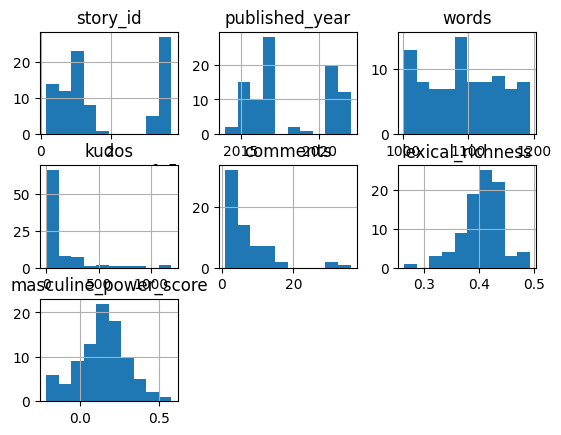

In [ ]:
# Q3a (code): Check data distribution
df_f.hist()

In [ ]:
# Q3b (code): compute some descriptive statistics
# Compute descriptive statistics for specific columns
specific_stats = df_f[['kudos', 'masculine_power_score', 'published_year', 'words','lexical_richness','comments']].describe()

# Display the descriptive statistics for specific columns
print(specific_stats)


             kudos  masculine_power_score  published_year        words  \
count    90.000000              90.000000       90.000000    90.000000   
mean    133.888889               0.142780     2018.088889  1094.344444   
std     229.121598               0.156995        2.612177    55.327048   
min       0.000000              -0.212034     2014.000000  1002.000000   
25%      19.250000               0.055153     2016.000000  1042.250000   
50%      53.000000               0.130424     2017.000000  1095.000000   
75%     121.000000               0.240689     2021.000000  1141.750000   
max    1190.000000               0.579048     2022.000000  1194.000000   

       lexical_richness   comments  
count         90.000000  90.000000  
mean           0.405027   5.000000  
std            0.037109   6.709041  
min            0.264443   0.000000  
25%            0.384458   0.000000  
50%            0.410169   3.000000  
75%            0.428415   6.750000  
max            0.491349  36.000000  


In [ ]:
# Q3c (code): Check for any missing values
# Check for any missing values
missing_values = df_f.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
lexical_richness         0
masculine_power_score    0
dtype: int64


In [ ]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
# Replace all NaN values with zeros
df_f.fillna(0, inplace=True)

# Check for any missing values again
missing_values_after_replace = df_f.isnull().sum()

# Display the count of missing values for each column after replacement
print(missing_values_after_replace)


story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
lexical_richness         0
masculine_power_score    0
dtype: int64


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

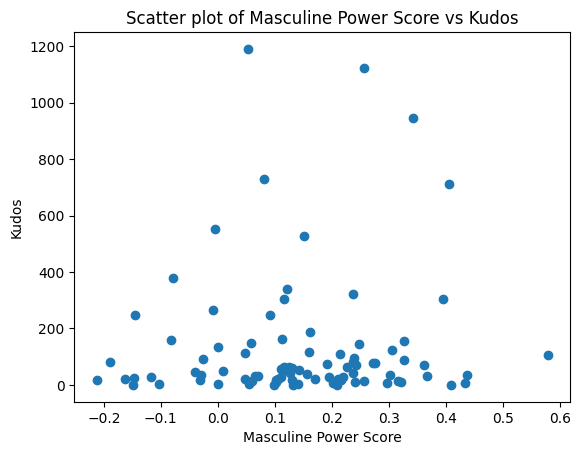

In [ ]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
# Create a scatter plot
plt.scatter(df_f['masculine_power_score'], df_f['kudos'])

# Add labels and title
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.title('Scatter plot of Masculine Power Score vs Kudos')

# Display the plot
plt.show()


**Q5. Multiple Regression and Analysis**

In [ ]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
import statsmodels.api as sm

# Define independent variables (features)
X = df_f[['masculine_power_score', 'published_year', 'lexical_richness']]

# Add constant to independent variables (necessary for OLS regression)
X_sm = sm.add_constant(X)

# Define dependent variable
y = df_f['kudos']

# Fit OLS regression model
model = sm.OLS(y, X_sm).fit()

# Print regression results summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.540
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00159
Time:                        06:28:22   Log-Likelihood:                -608.33
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.999e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

R-squared and Adj. R-squared tell us the percentage of variation in the dependent variable (kudos) that is explained by the independent variables (masculine power score, published year, and lexical richness) in the model. In this model, R-squared is 16.2%, meaning that our independent variables can explain 16.2% of the variation in kudos. Adj. R-squared, slightly lower at 13.3%, takes into account the number of independent variables and sample size. The decrease in both values suggests that our independent variables do not fully explain the variation in kudos, indicating that there may be other factors at play.

In [ ]:
# Q6b (words): Interpret F-test result

The F-test result indicates whether the overall regression model is statistically significant. In this case, with an F-statistic of 5.540 and a p-value of 0.00159, the model is significant. This means that at least one of the independent variables (masculine power score, published year, and lexical richness) has a significant effect on the dependent variable (kudos).

In [ ]:
# Q6c (words): Interpret coefficients and t-test result


*   const (6.999e+04): The constant term is significantly different from zero, with a t-value of 3.995 and a p-value < 0.001. This suggests that the base number of kudos, when all other variables are held at zero, is significantly different from zero.
*   masculine_power_score (52.7922): This variable is not statistically significant (p-value 0.716) with a wide confidence interval (-234.749, 340.333), indicating that the masculine power score does not significantly impact the number of kudos in the given dataset.
*   published_year (-34.6964): The coefficient for published year is statistically significant (p-value < 0.001), with a negative value indicating that more recent stories tend to have fewer kudos. The t-value of -3.995 indicates that this result is statistically significant.
*   lexical_richness (390.8527): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524). The coefficient is not statistically significant, suggesting that lexical richness does not have a significant impact on kudos scores in the given dataset.








**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [ ]:
from sklearn.linear_model import LinearRegression

# Define predictor and response
predictor = df_f[['masculine_power_score']]
response = df_f[['kudos']]

# Instantiate and fit the linear regression model
linreg = LinearRegression()
regression_model = linreg.fit(predictor, response)

In [ ]:
# Predicting the kudo base on musculinity
predictions = regression_model.predict(predictor)

# Calculating residuals
residuals = response - predictions

print("Predictions:")
print(predictions)

print("Residuals:")
print(residuals)


Predictions:
[[129.03568277]
 [146.66431582]
 [175.69687938]
 [131.91635265]
 [140.95934   ]
 [119.7354716 ]
 [125.98052042]
 [138.95537508]
 [105.95884815]
 [143.08592226]
 [151.0890494 ]
 [131.27010029]
 [102.04262235]
 [108.93642512]
 [126.48063235]
 [144.74661453]
 [143.33341429]
 [135.72883977]
 [130.99522297]
 [132.72826436]
 [140.3317603 ]
 [155.40582473]
 [132.32922994]
 [132.77060168]
 [130.06975783]
 [136.48153836]
 [121.13105128]
 [141.18068741]
 [131.40169571]
 [130.83462685]
 [148.62471567]
 [124.75916744]
 [110.28091544]
 [135.24475213]
 [130.91328115]
 [133.64668611]
 [139.57187604]
 [149.11069721]
 [135.54328396]
 [161.78252183]
 [ 99.8866347 ]
 [129.68110738]
 [159.49477472]
 [131.34180037]
 [125.39062994]
 [106.07679804]
 [151.44189884]
 [143.00007183]
 [144.70176303]
 [143.47772399]
 [127.01858598]
 [154.86394334]
 [151.57059361]
 [128.04972644]
 [133.77472216]
 [130.36175932]
 [120.20607107]
 [140.83223376]
 [132.29102479]
 [141.89298754]
 [159.0518707 ]
 [146.29487

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals['kudos'])
print('Shapiro-Wilk Test:', shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.5875695943832397, pvalue=1.6284457438650417e-14)


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:


Based on the Shapiro-Wilk normality test, the statistic for our sample data is 0.5876, with a p-value of 1.6284e-14, significantly lower than the typical significance level (e.g., 0.05). Hence, we reject the null hypothesis, indicating that the sample data does not follow a normal distribution.

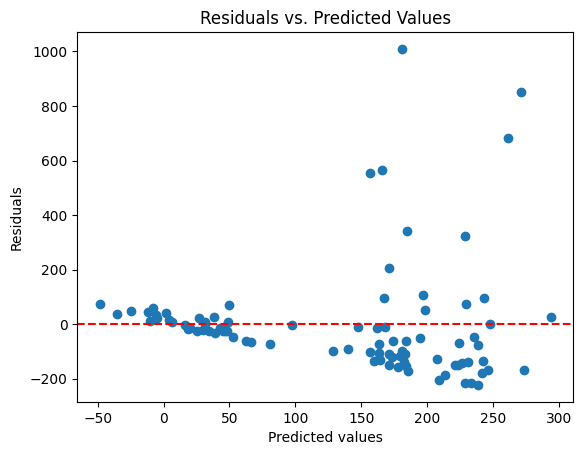

In [ ]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
# Culculate reseiduals
predicted_values = df_f['predicted_kudos']
actual_values = df_f['kudos']
residuals = actual_values - predicted_values

# Plot a scatterplot of residuals vs. predicted values
plt.scatter(predicted_values, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:


In the graph, the points exhibit a fan-shaped pattern as the predicted values increase, indicating heteroscedasticity, where the variance of residuals varies across different levels of predictor variables. This may lead to bias in model parameter estimation and distortion in confidence intervals, consequently affecting the model's effectiveness and the accuracy of inferences.

**Q8: Multicollinearity**

In [ ]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



                Variable         VIF
0  masculine_power_score    1.842563
1         published_year  121.647615
2       lexical_richness  122.003240


In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:


The multicollinearity test reveals high VIF values for both published_year (VIF = 121.648) and lexical_richness (VIF = 122.003), indicating significant multicollinearity issues. This suggests that these variables are highly correlated with other predictors in the model, potentially leading to unstable coefficient estimates and reduced interpretability. Addressing multicollinearity is essential for improving the reliability and accuracy of the regression model.

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?


**Introduction:**
BTS fanfiction holds the largest share on the AO3 fanfiction platform, where male characters deviate from traditional norms, displaying a softer, more feminine demeanor. Hence, our research question aims to investigate whether the portrayal of masculinity is a key factor influencing the success of novels within limited publication years and word counts.

**Methodology:**
Initially, we utilized the Bem Sex-Role Inventory (BSRI) to categorize personal traits into 60 attributes: 20 masculine, 20 feminine, and 20 neutral traits. Subsequently, employing the rivetera language model (BERT), we analyzed segmented files and conducted language model training to obtain the Masculine Power Score.Following this, we employed the Type-Token Ratio (TTR) to measure lexical richness. With these preparations, we conducted the research using the following methods:

1. Multiple Linear Regression: Employed kudos as the dependent variable and masculine power score, published year, and word count as independent variables for regression analysis.
2. Residual Analysis: Conducted normality and homoscedasticity tests on residuals to validate linear regression assumptions.
3. Model Evaluation: Assessed the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
4. Multicollinearity Check: Calculated the Variance Inflation Factor (VIF) for independent variables to detect multicollinearity.

**Results and Conclusion:**
The analysis revealed that the independent variables (masculine power score, published year, and lexical richness) were unable to fully explain the variance in kudos. However, the F-test indicated that certain factors did have an impact. Moreover, the negative coefficient for published year implied that more recent stories tend to receive fewer kudos. Additionally, lexical richness showed no significant impact on kudos scores in the given dataset, while the masculine power score did not significantly influence kudos numbers.
Multicollinearity testing suggested a high correlation between these variables and other predictors in the model, potentially leading to unstable coefficient estimates and reduced interpretability.

**Improvement**
Here are a few areas that need improvement: The Bem Sex Role Inventory (BSRI), developed in 1974, may be too outdated to fully meet current needs. Updating to newer theories could be more helpful. Additionally, there are many factors influencing the success of fanfiction beyond masculinity score, publication year, and word count. Factors such as the influence of the original media, the age demographics of the fan base, and others should be considered to improve the accuracy of the results.

In conclusion, while masculinity portrayal, publication year, and lexical richness contribute to fanfiction success to some extent, their combined influence remains limited. Further research is necessary to understand other factors contributing to fanfiction popularity.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.